# In reviewing consumer mortages loans originated in 2017, what are some demographic information we can identify?

## Data was gathered from:https://www.consumerfinance.gov/data-research/hmda/explore


### Importing modules and dataset

In [1]:
import os
import sqlite3
import pandas as pd
import sys
import matplotlib.pyplot as plt
conn = sqlite3.connect('HMDA_data.db')
hmda_data = pd.read_csv('hmda_lar_clean.csv')
hmda_data.to_sql('hmda_data', conn, if_exists='replace')



In [2]:
hmda_data.dtypes

tract_to_msamd_income             float64
rate_spread                       float64
population                        float64
minority_population               float64
number_of_owner_occupied_units    float64
number_of_1_to_4_family_units     float64
loan_amount_000s                    int64
hud_median_family_income          float64
applicant_income_000s             float64
state_name                         object
state_abbr                         object
respondent_id                      object
purchaser_type_name                object
property_type_name                 object
preapproval_name                   object
owner_occupancy_name               object
msamd_name                         object
loan_type_name                     object
loan_purpose_name                  object
lien_status_name                   object
hoepa_status_name                  object
county_name                        object
co_applicant_sex_name              object
co_applicant_race_name_1          

Here I am reviewing all of the headers in the dataset and the top 5 lines of data

In [3]:
hmda_data.head()

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,co_applicant_race_name_1,co_applicant_ethnicity_name,census_tract_number,as_of_year,applicant_sex_name,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
0,225.699997,NaN,4325.0,7.170000,1325.0,1447.0,250,65600.0,142.0,Kentucky,...,No co-applicant,No co-applicant,87.00,2017,Female,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Consumer Financial Protection Bureau,CFPB,Loan originated
1,84.309998,1.54,4627.0,7.460000,1385.0,1882.0,130,65600.0,110.0,Kentucky,...,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",212.00,2017,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
2,119.059998,NaN,4942.0,24.629999,369.0,494.0,132,65600.0,39.0,Kentucky,...,No co-applicant,No co-applicant,302.00,2017,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Department of Housing and Urban Development,HUD,Loan originated
3,63.680000,NaN,8037.0,30.750000,1721.0,2291.0,114,65600.0,66.0,Kentucky,...,White,Not Hispanic or Latino,119.05,2017,Male,White,Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
4,78.059998,NaN,5500.0,4.250000,1722.0,2237.0,65,65600.0,69.0,Kentucky,...,White,Not Hispanic or Latino,1002.00,2017,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Application denied by financial institution


First thing I am interested in is identifying where the loans were originated by  county

In [4]:
county_location = pd.read_sql_query("""
    SELECT
        county_name,
        count(*) as "County"
    FROM hmda_data
    GROUP BY 
    county_name
    ORDER BY 
    count(*) DESC
""",conn)

print(county_location)

          county_name  County
0    Jefferson County   34150
1        Clark County    6241
2      Bullitt County    4476
3        Floyd County    3908
4       Oldham County    3474
5       Shelby County    2379
6     Harrison County    2075
7   Washington County    1148
8      Spencer County    1081
9        Scott County     939
10       Henry County     658
11     Trimble County     402


While seeing this in a table is nice, lets try and look at the data in the chart

In [5]:
def mylocation(hmda_data):
    for x in hmda_data:
        print(x)
        
results_location = pd.Series(hmda_data.groupby(['county_name'])['respondent_id'].count())

mylocation(results_location)

4476
6241
3908
2075
658
34150
3474
939
2379
1081
402
1148


Text(0,0.5,'Location of loans by County')

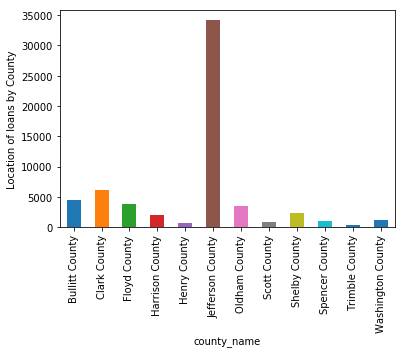

In [6]:
results_location.plot('bar')
plt.ylabel('Location of loans by County')

Well, it is not too surprising for the population to be heavily favored for peole who live in Jefferson County. I'm curious to see what corporations and banks have originated these loans.

In [7]:
pd.read_sql_query("""
    SELECT
        agency_name,
        count(*) as "# of loans"
    FROM hmda_data
    GROUP BY agency_name
    ORDER BY 
    count(*) DESC
""",conn)

,agency_name,# of loans
0,Department of Housing and Urban Development,28044
1,Consumer Financial Protection Bureau,16481
2,Federal Deposit Insurance Corporation,10071
3,National Credit Union Administration,3711
4,Office of the Comptroller of the Currency,1696
5,Federal Reserve System,928


In [8]:
def mybank(hmda_data):
    for x in hmda_data:
        print(x)
        
results_bank = pd.Series(hmda_data.groupby(['agency_name'])['respondent_id'].count())

mylocation(results_bank)

16481
28044
10071
928
3711
1696


Text(0,0.5,'Number of loans by bank')

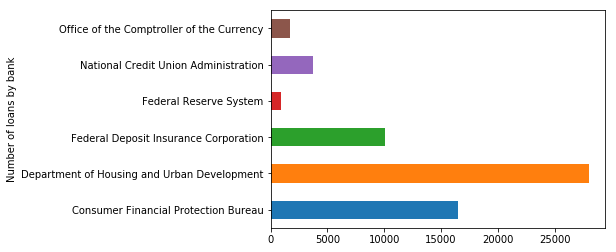

In [9]:
results_bank.plot('barh')
plt.ylabel('Number of loans by bank')

While I do see the value of providing charts, I prefer to look at databales to do more granular comparison. Let's look at bank information broken down by loan metrics.

In [10]:
pd.read_sql_query("""
    SELECT
    agency_abbr,
    min(loan_amount_000s) as "Smallest Loan Amount (000's)",
    max(loan_amount_000s) as "Largest Loan Amount (000's)",
    avg(loan_amount_000s) as "Average Loan Amount (000's)"
    FROM hmda_data
    GROUP by agency_abbr
""", conn)


,agency_abbr,Smallest Loan Amount (000's),Largest Loan Amount (000's),Average Loan Amount (000's)
0,CFPB,1,73312,172.289364
1,FDIC,1,42320,184.711548
2,FRS,2,15433,193.321121
3,HUD,1,43575,172.409999
4,NCUA,1,7184,143.343034
5,OCC,1,3500,161.079009


I'm interested in seeing the break down of loan size information by sex. Lets see what the count, largest, average loan size and income is by sex.

In [11]:
pd.read_sql_query("""
    SELECT
    applicant_sex_name,
    count(loan_amount_000s) as "Count of Loans",
    min(loan_amount_000s) as "Smallest Loan Amount (000's)",
    max(loan_amount_000s) as "Largest Loan Amount (000's)",
    avg(loan_amount_000s) as "Average Loan Amount (000's)",
    avg(applicant_income_000s) as "Average Income (000's)"
    FROM hmda_data
    GROUP by applicant_sex_name
    ORDER BY 
    count(*) DESC
""", conn)


,applicant_sex_name,Count of Loans,Smallest Loan Amount (000's),Largest Loan Amount (000's),Average Loan Amount (000's),Average Income (000's)
0,Male,33184,1,3263,173.126597,92.156123
1,Female,17806,1,11750,138.917500,68.043194
2,Not applicable,6867,1,73312,263.583661,79.204429
3,"Information not provided by applicant in mail,...",3074,1,1520,159.631750,92.335645


Let's look at the same information, but broken down my race.

In [12]:
pd.read_sql_query("""
    SELECT
    applicant_race_name_1,
    count(loan_amount_000s) as "Count of Loans",
    min(loan_amount_000s) as "Smallest Loan Amount (000's)",
    max(loan_amount_000s) as "Largest Loan Amount (000's)",
    avg(loan_amount_000s) as "Average Loan Amount (000's)",
    avg(applicant_income_000s) as "Average Income (000's)"
    FROM hmda_data
    GROUP by applicant_race_name_1
    ORDER BY 
    count(*) DESC
    
""", conn)

,applicant_race_name_1,Count of Loans,Smallest Loan Amount (000's),Largest Loan Amount (000's),Average Loan Amount (000's),Average Income (000's)
0,White,43238,1,11750,163.761830,85.518889
1,Not applicable,6866,1,73312,263.644917,79.313793
2,"Information not provided by applicant in mail,...",4991,1,3262,161.956722,90.896574
3,Black or African American,4427,1,1613,129.172577,62.501570
4,Asian,1024,5,1613,191.064453,91.659319
5,American Indian or Alaska Native,296,1,999,134.635135,70.082734
6,Native Hawaiian or Other Pacific Islander,89,1,383,143.146067,81.574713
